In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("../train.csv")

In [3]:
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Age', 'Name' ,'SSN', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Utilization_Ratio'])


In [4]:
df = pd.get_dummies(df, columns=['Credit_Score', 'Credit_Mix'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Annual_Income           100000 non-null  float64
 1   Monthly_Inhand_Salary   100000 non-null  float64
 2   Num_Bank_Accounts       100000 non-null  float64
 3   Num_Credit_Card         100000 non-null  float64
 4   Interest_Rate           100000 non-null  float64
 5   Num_of_Loan             100000 non-null  float64
 6   Delay_from_due_date     100000 non-null  float64
 7   Num_of_Delayed_Payment  100000 non-null  float64
 8   Outstanding_Debt        100000 non-null  float64
 9   Credit_History_Age      100000 non-null  float64
 10  Monthly_Balance         100000 non-null  float64
 11  Credit_Score_Good       100000 non-null  bool   
 12  Credit_Score_Poor       100000 non-null  bool   
 13  Credit_Score_Standard   100000 non-null  bool   
 14  Credit_Mix_Bad       

In [6]:
# Vérifier les doublons dans le DataFrame
duplicates = df.duplicated()

# Compter le nombre total de doublons
total_duplicates = duplicates.sum()

print("Nombre total de doublons dans le DataFrame:", total_duplicates)


Nombre total de doublons dans le DataFrame: 1


In [7]:
# Trouver toutes les occurrences de doublons dans le DataFrame
all_duplicate_rows = df[df.duplicated(keep=False)]

print("Toutes les occurrences de doublons dans le DataFrame :")
print(all_duplicate_rows)


Toutes les occurrences de doublons dans le DataFrame :
       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
14880       178088.4                14839.7                5.0   
14881       178088.4                14839.7                5.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
14880              4.0           11.0          3.0                 22.0   
14881              4.0           11.0          3.0                 22.0   

       Num_of_Delayed_Payment  Outstanding_Debt  Credit_History_Age  \
14880                     7.0             676.1               220.0   
14881                     7.0             676.1               220.0   

       Monthly_Balance  Credit_Score_Good  Credit_Score_Poor  \
14880         280.3234              False               True   
14881         280.3234              False               True   

       Credit_Score_Standard  Credit_Mix_Bad  Credit_Mix_Good  \
14880                  False           False    

In [8]:
# Supprimer les doublons du DataFrame
df_cleaned = df.drop_duplicates()

# Afficher les dimensions du DataFrame après suppression des doublons
print("Dimensions du DataFrame après suppression des doublons:", df_cleaned.shape)


Dimensions du DataFrame après suppression des doublons: (99999, 17)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Outstanding_Debt", "Credit_History_Age", 
                   "Monthly_Balance"]

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [10]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop(columns=['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard'])
y = df[['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the range of k values to search
# param_grid = {'n_neighbors': range(1, 21)}

# # Initialize kNN classifier
# knn = KNeighborsClassifier()

# # Perform grid search with 5-fold cross-validation
# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Get the best value of k
# best_k = grid_search.best_params_['n_neighbors']
# print("Best value of k:", best_k)
best_k = 3


In [13]:
# import matplotlib.pyplot as plt

# # Extract the mean cross-validated scores for each value of k
# mean_scores = grid_search.cv_results_['mean_test_score']

# # Extract the values of k from the parameter grid
# k_values = param_grid['n_neighbors']

# # Plot the relationship between k and the mean cross-validated scores
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, mean_scores, marker='o', linestyle='-')
# plt.title('Mean Cross-validated Accuracy vs. k')
# plt.xlabel('k')
# plt.ylabel('Mean Accuracy')
# plt.grid(True)
# plt.show()


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize kNN classifier with the best value of k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the kNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [15]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: multilabel-indicator is not supported

Accuracy: 0.7429942418426103
Precision: 0.7438305350597567
Recall: 0.7429942418426103
F1-score: 0.7433284248759779
Confusion Matrix:
[[ 5866   744  1936]
 [ 1081 20297  6348]
 [ 2134  6503 28031]]


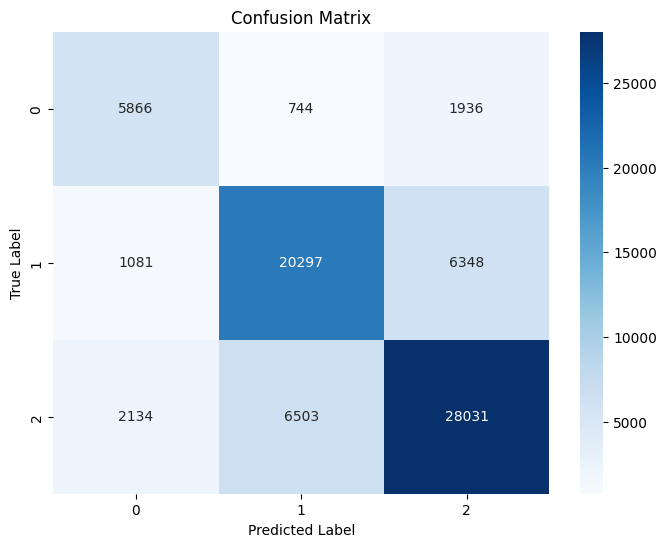

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 3

# Initialize kNN classifier with the best value of k
knn_classifier = KNeighborsClassifier(n_neighbors=K)

# Train the kNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


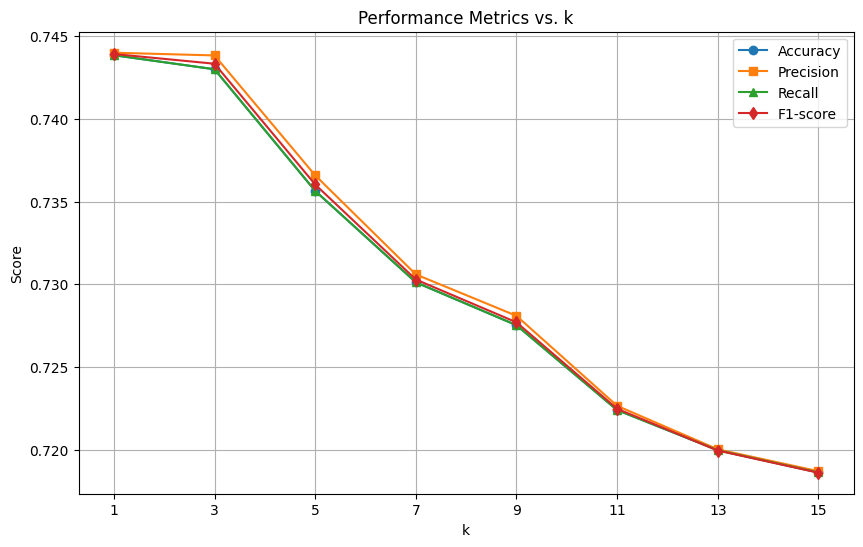

In [ ]:
import numpy as np

# Define a list of k values to experiment with
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store performance metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over each value of k
for k in k_values:
    # Initialize kNN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the kNN classifier on the training data
    knn_classifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append performance metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot the performance metrics for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, precisions, label='Precision', marker='s')
plt.plot(k_values, recalls, label='Recall', marker='^')
plt.plot(k_values, f1_scores, label='F1-score', marker='d')
plt.title('Performance Metrics vs. k')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_2812\3995649205.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = scaler.fit_transform(X[X.columns])


Étiquettes de classe uniques dans y: [0 1 2]
Exemple de probabilités prédites par le modèle:
[[0.8 0.  0.2]
 [0.  0.8 0.2]
 [0.4 0.  0.6]
 [0.  1.  0. ]
 [0.8 0.  0.2]]


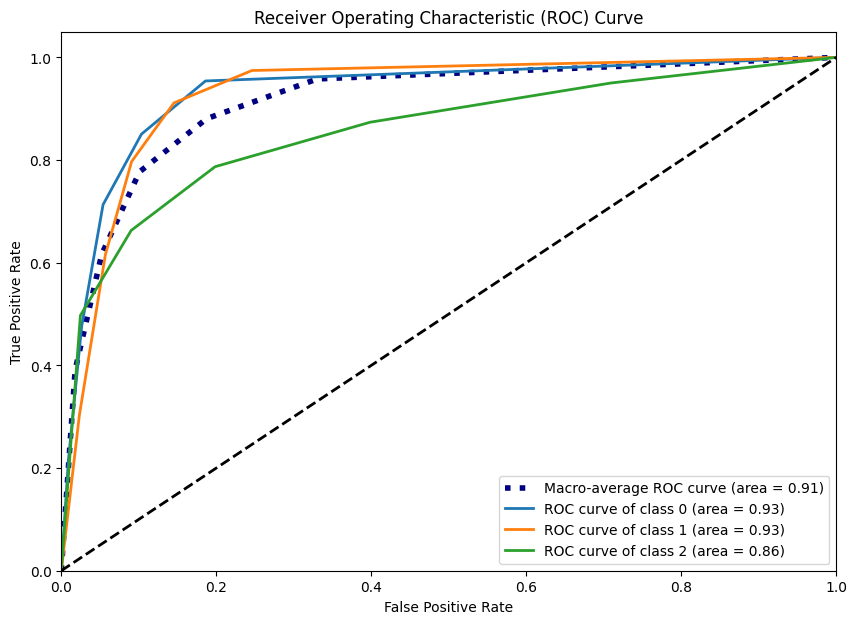

Classification Report:
              precision    recall  f1-score   support

        Good       0.74      0.71      0.73      3527
        Poor       0.79      0.80      0.79      5874
    Standard       0.82      0.79      0.80     10599

   micro avg       0.79      0.78      0.79     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.79      0.78      0.79     20000
 samples avg       0.78      0.78      0.78     20000



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('../train.csv')

# Préparation des données : encodage des variables catégorielles
df = pd.get_dummies(df, columns=['Credit_Mix'], drop_first=True)

# Sélection des variables spécifiées
variables = ["Annual_Income", "Monthly_Inhand_Salary", 
             "Num_Bank_Accounts", "Num_Credit_Card", 
             "Interest_Rate", "Num_of_Loan", 
             "Delay_from_due_date", "Num_of_Delayed_Payment", 
             "Outstanding_Debt", "Credit_History_Age", 
             "Monthly_Balance"] + [col for col in df.columns if 'Credit_Mix_' in col]

X = df[variables]
y = df['Credit_Score']

# Normalisation des variables numériques
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Encodage de la variable cible
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Vérification des étiquettes de classe
unique_labels = np.unique(y)
print(f"Étiquettes de classe uniques dans y: {unique_labels}")

# Binarisation des étiquettes de classe pour ROC
y = label_binarize(y, classes=np.arange(len(unique_labels)))
n_classes = y.shape[1]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle k-NN
model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
model.fit(X_train, y_train)

# Prédiction des probabilités
y_score = model.predict_proba(X_test)

# Vérification des probabilités prédites
print(f"Exemple de probabilités prédites par le modèle:\n{y_score[:5]}")

# Calcul des courbes ROC et AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcul de la courbe ROC moyenne (macro-averaged)
fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Tracé des courbes ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC de KNN')
plt.legend(loc="lower right")
plt.show()

# Classification report
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


### Explanation:

1. **Data Preparation**:
    - The data loading and preprocessing steps (including scaling and encoding) are identical to those used for the RandomForest model.

2. **Model Training**:
    - The k-NN model is implemented using `KNeighborsClassifier` within a `OneVsRestClassifier`.
    - The `n_neighbors` parameter is set to 5 (commonly used default), but you can adjust this based on your specific needs.

3. **Prediction and Evaluation**:
    - The model predicts probabilities for the test set.
    - ROC curves and AUC are calculated for each class and plotted similarly to the previous RandomForest model implementation.

4. **Additional Classification Report**:
    - The classification report is generated to provide a detailed performance evaluation of the k-NN model.

By running this updated code, you should be able to evaluate the performance of a k-NN classifier on your dataset in a manner similar to how you evaluated the RandomForest model. Adjust the number of neighbors and other parameters as needed for your specific use case.